# ARIMA Model for Forecasting

A popular statistical method for time series forecasting is the ARIMA model. ARIMA is an acronym that stands for AutoRegressive Integrated Moving Average. It is a class of model that captures a suite of different standard temporal structures in time series data. In this notebook, you will discover how to develop an ARIMA model for time series data with Python.

We will use the Shampoo Sales dataset as an example. This dataset describes the monthly number of sales of shampoo over a 3 year period. The units are a sales count and there are 36 observations. The original dataset is credited to Makridakis, Wheelwright and Hyndman (1998).

In [1]:
data_path = './data/shampoo-sales.csv'

In [2]:
# load and plot dataset
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot

# load dataset
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')
series = read_csv(data_path, header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)

# summarize first few rows
print(series.head())

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales, dtype: float64


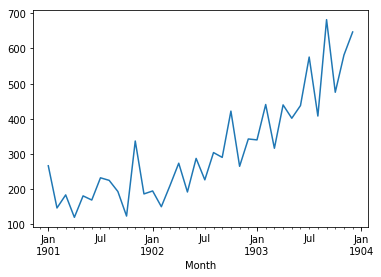

In [3]:
# line plot
series.plot()
pyplot.show()

In [4]:
# autocorrelation plot of time series
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot

# load dataset
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')
series = read_csv(data_path, header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)

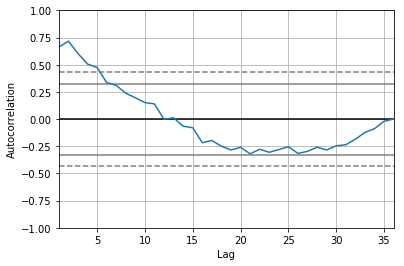

In [5]:
# autocorrelation plot
autocorrelation_plot(series)
pyplot.show()

In [6]:
# fit an ARIMA model and plot residual errors
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot

# load dataset
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')
series = read_csv(data_path, header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)

# fit model
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit(disp=0)

# summary of fit model
print(model_fit.summary())

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.Sales   No. Observations:                   35
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -196.170
Method:                       css-mle   S.D. of innovations             64.241
Date:                Mon, 25 Mar 2019   AIC                            406.340
Time:                        18:35:47   BIC                            417.227
Sample:                    02-01-1901   HQIC                           410.098
                         - 12-01-1903                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            12.0649      3.652      3.304      0.003       4.908      19.222
ar.L1.D.Sales    -1.1082      0.183     -6.063      0.000      -1.466      -0.750
ar.L2.D.Sales    -0.6203      0.282     

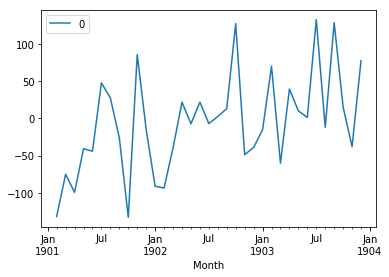

In [7]:
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()

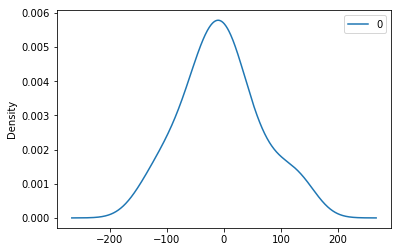

In [8]:
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()

In [9]:
# summary stats of residuals
print(residuals.describe())

                0
count   35.000000
mean    -5.495189
std     68.132884
min   -133.296583
25%    -42.477916
50%     -7.186570
75%     24.748367
max    133.237999


In [10]:
# evaluate an ARIMA model using a walk-forward validation
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# load dataset
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')
series = read_csv(data_path, header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)

# split into train and test sets
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

predicted=349.117677, expected=342.300000
predicted=306.513008, expected=339.700000
predicted=387.376434, expected=440.400000
predicted=348.154253, expected=315.900000
predicted=386.308781, expected=439.300000
predicted=356.082097, expected=401.300000
predicted=446.379514, expected=437.400000
predicted=394.737301, expected=575.500000
predicted=434.915489, expected=407.600000
predicted=507.923423, expected=682.000000
predicted=435.482775, expected=475.300000
predicted=652.743772, expected=581.300000
predicted=546.343495, expected=646.900000
Test RMSE: 83.417


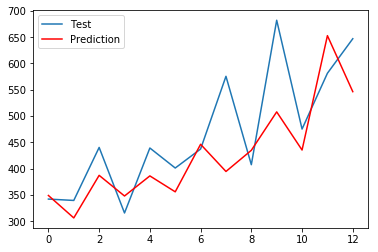

In [11]:
# plot forecasts against actual outcomes
pyplot.plot(test, label='Test')
pyplot.plot(predictions, color='red', label='Prediction')
pyplot.legend()
pyplot.show()

### References:
The website Data Market provides access to a large number of time series datasets. Specically, the Time Series Data Library (https://datamarket.com/data/list/?q=provider:tsdl) created by Rob Hyndman, Professor of Statistics at Monash University, Australia.